In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
df = pd.read_csv('housingUnits.csv')
dfhh = df.copy().drop(['total_rooms', 'total_bedrooms'], axis = 1) # dataframe with standardized (by number of households) variables 2 and 3
dfPop = dfhh.copy()
varNames = df.columns


# Standardize by number of households
dfhh['roomPerHousehold'] = df['total_rooms'] / df['households']
dfhh['bedroomPerHousehold'] = df['total_bedrooms'] / df['households']
# Standarddize by population
dfPop['roomPerPerson'] = df['total_rooms'] / df['population']
dfPop['bedroomPerPerson'] = df['total_bedrooms'] / df['population']

def graphCol(colName):
    plt.hist(df[colName], bins = 30)
    plt.xlabel(colName)
    plt.ylabel('Frequency')
    plt.title(colName)
    plt.savefig(colName+'.jpg')

def graphScatter(colName1, colName2):
   # plt.figure(figsize = (10,10))
    plt.plot(dfPop[colName1], dfPop[colName2], 'o', markersize = 1)
    plt.xlabel(colName1)
    plt.ylabel(colName2)
    plt.title('{col1} vs. {col2}   '.format(col1 = colName1, col2 = colName2) + 'r = {:.3f}'.format(np.corrcoef(dfPop[colName1], dfPop[colName2])[0,1] ))
    plt.savefig('{col1} vs {col2}'.format(col1 = colName1, col2 = colName2)+'.jpg')



# Basic EDA

In [ ]:
# Graph the all variables' distributions
fig, axis = plt.subplots(2,4, figsize = (25,10))

for ii in range(2):
    for jj in range(4):
        axis[ii,jj].hist(df[varNames[ii+jj]], bins = 30)
        axis[ii,jj].set_title(varNames[ii+jj])
        
plt.savefig('variableDistributions.jpg')

pd.plotting.scatter_matrix(df, figsize = (20,20))

# Question 1

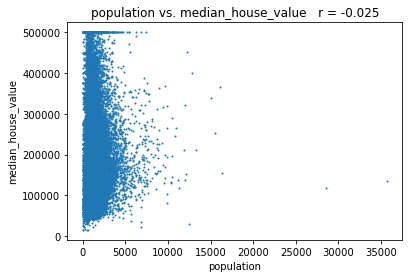

In [122]:
df.corr()
# v4 vs. target = -0.025
# v5 vs. target = 0.065
graphScatter('population', 'median_house_value')

# Question 2

In [ ]:
print(df.corr()['total_rooms']['median_house_value']) # correlation btw total rooms and house value
print(dfPop.corr()['roomPerPerson']['median_house_value']) # correlation btw rooms/person and house value
print(dfhh.corr()['roomPerHousehold']['median_house_value']) # corr btw room/hh and house value
print();
print(df.corr()['total_rooms']['median_house_value']) # correlation btw total rooms and house value
print(dfPop.corr()['bedroomPerPerson']['median_house_value']) # correlation btw bedrooms/person and house value
print(dfhh.corr()['bedroomPerHousehold']['median_house_value']) # corr btw bedroom/hh and house value

# Question 3

In [2]:
dfPop.corr()
# this is the correlation matrix of the dataset with the original variables 2 and 3 adjusted
# highest correlation: median income
# Lowest correlation: population

,housing_median_age,population,households,median_income,ocean_proximity,median_house_value,roomPerPerson,bedroomPerPerson
housing_median_age,1.000000,-0.296244,-0.302916,-0.119034,-0.295012,0.105623,-0.107926,-0.037240
population,-0.296244,1.000000,0.907222,0.004834,0.039415,-0.024650,-0.140520,-0.219651
households,-0.302916,0.907222,1.000000,0.013033,-0.012873,0.065843,-0.028473,-0.160157
median_income,-0.119034,0.004834,0.013033,1.000000,-0.163755,0.688075,0.237828,0.116347
ocean_proximity,-0.295012,0.039415,-0.012873,-0.163755,1.000000,-0.397251,0.028328,0.027222
median_house_value,0.105623,-0.024650,0.065843,0.688075,-0.397251,1.000000,0.209482,0.113095
roomPerPerson,-0.107926,-0.140520,-0.028473,0.237828,0.028328,0.209482,1.000000,0.641464
bedroomPerPerson,-0.037240,-0.219651,-0.160157,0.116347,0.027222,0.113095,0.641464,1.000000


# Question 4

In [ ]:
X = df.iloc[:, :-1] #original features
y = df.iloc[:, -1] #target variable

Xpop = dfPop.drop('median_house_value', axis = 1) #variables 2 and 3 adjusted by population
Xhh = dfhh.drop('median_house_value', axis = 1) #variables 2 and 3 adjusted by number of households

model = LinearRegression()
modle.fit(X, y)
Xr2 = modle.score(X,y)

modle.fit(Xpop, y)
Xpopr2 = modle.score(Xpop, y)

modle.fit(Xhh, y)
Xhh = modle.score(Xhh, y)
print(Xr2)
print(Xpopr2)
print(Xhh)

# OLS with only median_income
model.fit(df['median_income'].values.reshape(-1,1),y)
model.score(df['median_income'].values.reshape(-1,1),y)

# Question 5

corr btw room/person and bedroom/person:  0.6414637002481975
corr btw population and number of households:  0.9072222660959659


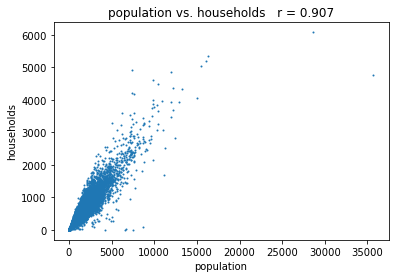

In [126]:
print("corr btw room/person and bedroom/person: ",dfPop.corr().iloc[-1, -2])
print("corr btw population and number of households: ",dfPop.corr().iloc[1,2])

graphScatter("population", 'households')


# Extra credit (a)

In [ ]:
def graphCol(colName):
    plt.hist(df[colName], bins = 30)
    plt.xlabel(colName)
    plt.ylabel('Frequency')
    plt.title(colName)
    plt.savefig(colName+'.jpg')
    
'''plt.hist(df['housing_median_age'], bins = 100)
plt.xlabel("Years")
plt.ylabel('Frequency')
plt.title('Housing Median Age')'''

#plt.savefig('housing_median_age.jpg')

graphCol('housing_median_age')
#plt.savefig('median_house_value.jpg')

# Extra credit (b)

In [ ]:
graphCol('median_house_value')